In [1]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(0, "..")
sys.path.insert(0, "../src")

from graph_generation import load_cracow_city_graph
from common.show_graph import show_graph
from initial_population import create_initial_population

In [3]:
G, best_paths = load_cracow_city_graph(krk_json_path="../data")

In [4]:
from common.Genotype import Genotype

population = create_initial_population(G, best_paths)
# population = [
#     Genotype([
#          Line([1, 128], best_paths)
#     ])
# ]

In [5]:
# show_graph(G, population[0], show=True)

In [6]:
from fitness import fitness

fitness(population[0], G)

300212988.1091276

In [7]:
edge_colors = {}

for line in population[0].lines:
    for v, u in line.edges:
        #         u, v = line.stops[i], line.stops[i+1]
        #         print(edge_colors.index())
        #         print(u, v, 0)
        #         print(v, u, 0)
        #         print((u, v, 0) in G.edges)
        edge_colors[(v, u, 0)] = line.edge_color
        edge_colors[(u, v, 0)] = line.edge_color

#         break
#     break
#     print(line.stops, line.edge_color)

C = []
for edge in G.edges:
    if edge in edge_colors:
        C.append(edge_colors[edge])
    else:
        C.append("#000")

/home/norbert/.local/lib/python3.11/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


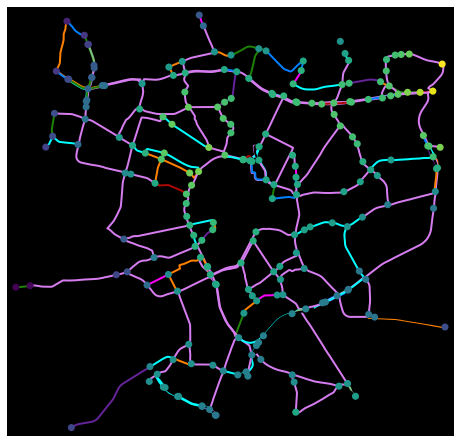

10
51 46
[(152, 151), (151, 67), (67, 7), (7, 6), (6, 69), (69, 57), (57, 55), (55, 56), (56, 59), (59, 60), (60, 61), (61, 174), (174, 194), (194, 174), (174, 61), (61, 60), (60, 64), (64, 63), (63, 12), (12, 9), (9, 77), (77, 5), (5, 4), (4, 105), (105, 44), (44, 45), (45, 40), (40, 51), (51, 52), (52, 112), (112, 31), (31, 123), (123, 124), (124, 166), (166, 126), (126, 166), (166, 124), (124, 123), (123, 31), (31, 154), (154, 50), (50, 46), (46, 45), (45, 44), (44, 105), (105, 102)]


In [8]:
import osmnx as ox

fig, ax = ox.plot_graph(
    G,
    bgcolor="k",
    node_color=G.graph["points"],
    node_size=50,
    edge_linewidth=2,
    edge_color=C,
)

print(len(population[0].lines))
print(len(population[0].lines[0].stops), len(population[0].lines[0].edges))
print(population[0].lines[0].edges)

In [ ]:
from new_generation.Mutators import LineMutator, GenotypeMutator
from new_generation.SpecimenCrossers import GenotypeCrosser
from new_generation.Sanitizers import BasicSanitizer
from new_generation.new_generation_function import NewGenerationRandomParams
from SimultionEngine import SimulationEngine
from survival import n_best_survive
from common.params import N_IN_POPULATION
from new_generation.new_generation_function import new_generation_random

line_mutator = LineMutator(G, list(range(len(G))), best_paths)
genotype_mutator = GenotypeMutator(G, best_paths)
genotype_crosser = GenotypeCrosser(G, best_paths)
sanitizer = BasicSanitizer(best_paths)

new_generation_params = NewGenerationRandomParams(
    chance_create_line=0.1,
    chance_cycle=0.1,
    chance_erase_line=0.1,
    chance_invert=0.5,
    chance_merge=0.25,
    chance_merge_specimen=0.5,
    chance_rot_cycle=0.5,
    chance_rot_right=0.5,
    chance_split=0.75,
    chance_erase_stop=0.1,
    chance_add_stop=0.3,
    chance_add_stop_mix=0.1,
    chance_replace_stops=0.1,
    chance_replace_stops_proximity=0.1,
    chance_merge_mix=0.5,  # brak wplywu
    cycle_stops_shift=0.5,  # brak wplywu
    chance_cycle_stops_shift=0.1,
    chance_line_based_merge=0.1,
)

sim_engine = SimulationEngine(
    G,
    initial_population=create_initial_population(G, best_paths),
    fitness_function=fitness,
    survival_function=lambda population: n_best_survive(
        population, N_IN_POPULATION // 8
    ),
    new_generation_function=lambda population, graph: new_generation_random(
        population,
        N_IN_POPULATION,
        line_mutator,
        genotype_mutator,
        genotype_crosser,
        sanitizer,
        new_generation_params,
    ),
    population_sanitizer=sanitizer,
)

sim_engine.run(100, 1, report_show=True)